In [82]:
import numpy as np 
import pandas as pd 
import sys, os 
import csv 
import matplotlib.pyplot as plt

In [83]:
#PATH = %pwd 
PATH = '/home/sathiesh/layer_study/loss/'

In [94]:
filename_0 = f'{PATH}run_brats_layer0_logs_0_training-tag-worker_0_loss.csv'
filename_1 = f'{PATH}run_brats_layer1_logs_0_training-tag-worker_0_loss.csv'
filename_2 = f'{PATH}run_brats_layer2_logs_0_training-tag-worker_0_loss.csv'
filename_3 = f'{PATH}run_brats_layer3_logs_0_training-tag-worker_0_loss.csv'
filename_4 = f'{PATH}run_4_training-tag-worker_0_loss.csv'
filename_5 = f'{PATH}run_5_training-tag-worker_0_loss.csv'

#filename_0 = f'{PATH}run_brats_layer0_logs_0_validation-tag-worker_0_loss.csv'
#filename_1 = f'{PATH}run_brats_layer1_logs_0_validation-tag-worker_0_loss.csv'
#filename_2 = f'{PATH}run_brats_layer2_logs_0_validation-tag-worker_0_loss.csv'
#filename_3 = f'{PATH}run_brats_layer3_logs_0_validation-tag-worker_0_loss.csv'
#filename_4 = f'{PATH}run_4_validation-tag-worker_0_loss.csv'
#filename_5 = f'{PATH}run_5_validation-tag-worker_0_loss.csv'

In [95]:
df0,df1,df2,df3,df4,df5 = pd.read_csv(filename_0),pd.read_csv(filename_1),pd.read_csv(filename_2),pd.read_csv(filename_3),pd.read_csv(filename_4),pd.read_csv(filename_5) 

In [97]:
x = np.array(df4['Step'])
y_0 = df0['Value']
y_1 = df1['Value']
y_2 = df2['Value']
y_3 = df3['Value']
y_4 = df4['Value']
y_5 = df5['Value']

In [98]:
x

array([   5,   10,   15,   20,   25,   30,   35,   40,   45,   50,   55,
         60,   65,   70,   75,   80,   85,   90,   95,  100,  105,  110,
        115,  120,  125,  130,  135,  140,  145,  150,  155,  160,  165,
        170,  175,  180,  185,  190,  195,  200,  205,  210,  215,  220,
        225,  230,  235,  240,  245,  250,  255,  260,  265,  270,  275,
        280,  285,  290,  295,  300,  305,  310,  315,  320,  325,  330,
        335,  340,  345,  350,  355,  360,  365,  370,  375,  380,  385,
        390,  395,  400,  405,  410,  415,  420,  425,  430,  435,  440,
        445,  450,  455,  460,  465,  470,  475,  480,  485,  490,  495,
        500,  505,  510,  515,  520,  525,  530,  535,  540,  545,  550,
        555,  560,  565,  570,  575,  580,  585,  590,  595,  600,  605,
        610,  615,  620,  625,  630,  635,  640,  645,  650,  655,  660,
        665,  670,  675,  680,  685,  690,  695,  700,  705,  710,  715,
        720,  725,  730,  735,  740,  745,  750,  7

In [99]:
# HACK siden val 4 og 5 
#x = np.array(df0['Step'])[array]
#y_0 = df0['Value'][array]
#y_1 = df1['Value'][array]
#y_2 = df2['Value'][array]
#y_3 = df3['Value'][array]
#y_4 = df4['Value']
#y_5 = df5['Value']

In [100]:
from scipy.interpolate import spline
xnew = np.linspace(x.min(),x.max(),2)

y_0_smooth = spline(x,y_0,xnew)
y_1_smooth = spline(x,y_1,xnew)
y_2_smooth = spline(x,y_2,xnew)
y_3_smooth = spline(x,y_3,xnew)
y_4_smooth = spline(x,y_4,xnew)
y_5_smooth = spline(x,y_5,xnew)

/home/sathiesh/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/home/sathiesh/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/home/sathiesh/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/home/sathiesh/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/home/sathiesh/.conda/envs/fastai/lib/python3.6/site-packages/ipykernel/__main__.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/home/sathiesh/.cond

In [101]:
import matplotlib.ticker as mtick

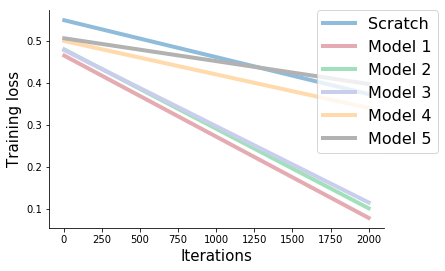

In [103]:
fig, ax = plt.subplots()
ax.plot(xnew,y_0_smooth ,'#8fbcda',linewidth=4, label ='Scratch')
ax.plot(xnew,y_1_smooth ,'#e4acb2',linewidth=4, label ='Model 1')
ax.plot(xnew,y_2_smooth, '#a2e0bb',linewidth=4, label ='Model 2')
ax.plot(xnew,y_3_smooth, '#c9ceed',linewidth=4, label ='Model 3')
ax.plot(xnew,y_4_smooth, '#ffdaad',linewidth=4, label ='Model 4')
ax.plot(xnew,y_5_smooth, '#B2B2B2',linewidth=4, label ='Model 5')
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0., prop={'size': 16})
# Hide the right and top spines
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Training loss', fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [104]:
fig.set_size_inches(16.5, 10)
fig.savefig('training.png', format='png')
#fig.savefig('validation.png', format='png')